# Hands-on 1
### Palmer Penguin Dataset
The Palmer Penguin dataset is a popular dataset used for data science and machine learning, particularly for classification tasks. It provides information on three species of penguins: Adelie, Chinstrap, and Gentoo, collected from three islands in the Palmer Archipelago, Antarctica. The dataset is often used as an alternative to the Iris dataset for demonstrating data analysis and machine learning techniques.

<img src="penguins.png" width="400" height="200">

### Description of the Dataset
The Palmer Penguin dataset contains the following columns:

- Species: The species of the penguin (Adelie, Chinstrap, Gentoo).
- Island: The island where the penguin was observed (Torgersen, Biscoe, Dream).
- Bill Length (mm): The length of the penguin's culmen (the upper ridge of the beak) in millimeters.
- Bill Depth (mm): The depth of the penguin's culmen in millimeters.
- Flipper Length (mm): The length of the penguin's flipper in millimeters.
- Body Mass (g): The body mass of the penguin in grams.
- Gender: The gender of the penguin (male, female).
- Year: The year the observation was made.

In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

df = pd.read_csv("data/penguins.csv")

To do:
- Print the first 5 rows of dataset.

In [3]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


To do:
- Print the descriptive statistics of the dataset.

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


To do:
- Plot the boxplot for "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"

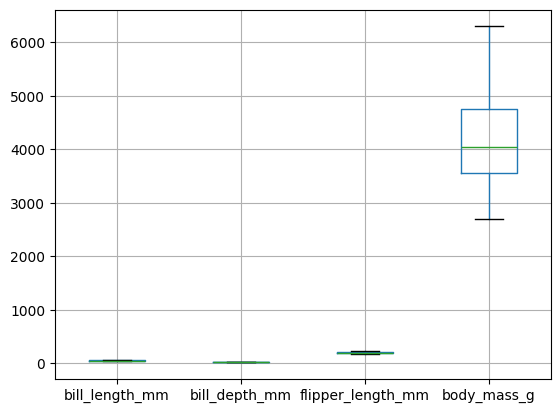

In [6]:
df.boxplot(column=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
plt.show()

To do:
- Check the class breakdown (number of data samples per class)

In [7]:
df.groupby('species').size()

species
Adelie       152
Chinstrap     68
Gentoo       124
dtype: int64

To do:
- Check the number of missing values in each column.

In [8]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
gender               11
year                  0
dtype: int64

To do:
- If there are  missing values, impute them using statistics (median, mean, mode).

In [9]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].median())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].median())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
gender               0
year                 0
dtype: int64

To do:
- Perform categorical encoding

In [10]:
df2 = pd.get_dummies(df, columns=['island', 'gender'])
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,gender_female,gender_male
0,Adelie,39.10,18.7,181.0,3750.0,2007,False,False,True,False,True
1,Adelie,39.50,17.4,186.0,3800.0,2007,False,False,True,True,False
2,Adelie,40.30,18.0,195.0,3250.0,2007,False,False,True,True,False
3,Adelie,44.45,17.3,197.0,4050.0,2007,False,False,True,False,True
4,Adelie,36.70,19.3,193.0,3450.0,2007,False,False,True,True,False


To do:
- Separate into featues (X) and target (y)

In [11]:
X = df2.drop(columns=['species', 'year'])
y = df2['species']

To do:
- Split into training (75%) and testing (25%) sets.

In [19]:
X_train, X_test, y_train, y_test = split(X, y, stratify=y, train_size=0.75, random_state=42)

To do:
- Use spotchecking technique to evaluate the performance of kNN, logistic regression, Gaussian naive bayes, support vector machine, decision tree, random forest, gradient boosting trees and MLP classifiers.
- Use stratified k-folds cross-validation with 5 folds.

In [20]:
models = {}
models['knn'] = KNeighborsClassifier()
models['lgr'] = LogisticRegression()
models['gnb'] = GaussianNB()
models['svc'] = SVC()
models['dtc'] = DecisionTreeClassifier()
models['rfc'] = RandomForestClassifier()
models['gbc'] = GradientBoostingClassifier()
models['mpc'] = MLPClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for n in models:
    scores = cross_val_score(models[n], X_train, y_train, cv=skf, n_jobs=-1)
    print(f'{n}: {scores.mean():.3%}, {scores.std():.3%}')

knn: 74.397%, 5.498%
lgr: 98.439%, 1.465%
gnb: 83.703%, 3.245%
svc: 71.282%, 5.173%
dtc: 97.285%, 2.882%
rfc: 98.839%, 1.542%
gbc: 96.908%, 2.613%
mpc: 39.992%, 13.501%


To:
- Apply Min-max scaling to the features

In [21]:
scaler = MinMaxScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

To do:
- Use spotchecking technique to evaluate the performance of kNN, logistic regression, Gaussian naive bayes, support vector machine, decision tree, random forest, gradient boosting trees and MLP classifiers on the scaled features.
- Use stratified k-folds cross-validation with 5 folds.

In [22]:
for n in models:
    scores = cross_val_score(models[n], Xs_train, y_train, cv=skf, n_jobs=-1)
    print(f'{n}: {scores.mean():.3%}, {scores.std():.3%}')

knn: 98.446%, 0.777%
lgr: 98.454%, 1.441%
gnb: 72.089%, 2.663%
svc: 98.839%, 0.948%
dtc: 97.285%, 1.967%
rfc: 98.454%, 1.441%
gbc: 96.908%, 2.613%
mpc: 98.454%, 1.441%


To do:
- Choose the best performing model
- Train the model using the training set and evaluate its performance using the test set

In [25]:
svc = SVC().fit(Xs_train, y_train)
print(f'Best model accuracy: {svc.score(Xs_test, y_test):.3%}')

Best model accuracy: 100.000%


To do:
- Print the classification report
- Plot the confusion matrix

In [26]:
report = classification_report(y_test, mpc.predict(Xs_test))
print(report)

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        38
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      1.00      1.00        31

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



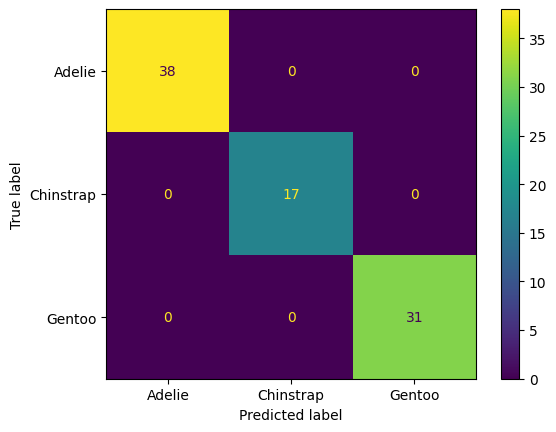

In [27]:
ConfusionMatrixDisplay.from_estimator(svc, Xs_test, y_test)
plt.show()